# Ejercicio 1 – Comparación de datasets estructurados y no estructurados   
**Alumna:** Helen Maureira Barrenechea  

## Objetivo: 
Comparar el procesamiento y análisis básico de dos tipos de datos:  
- **Estructurados** → dataset tabular (CSV)  
- **No estructurados** → dataset JSON con texto  

El propósito es reconocer las diferencias en formato, manipulación y tipo de análisis que puede realizarse con cada uno.

In [10]:
# Importar librerías principales
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Dataset estructurado: Iris (incluido en seaborn)
iris = sns.load_dataset("iris")

# Mostrar las primeras filas
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
# Información general del dataset
iris.info()

# Estadísticas descriptivas
iris.describe()

# Revisión de valores faltantes
iris.isnull().sum()
# Revisión de duplicados
iris.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


np.int64(1)

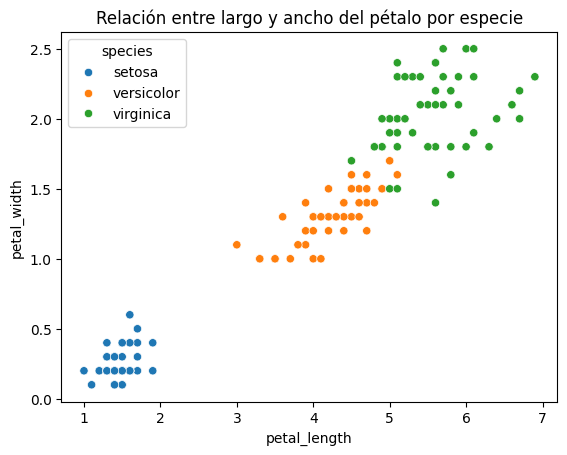

In [13]:
# Gráfico de dispersión: largo vs ancho del pétalo por especie
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species")
plt.title("Relación entre largo y ancho del pétalo por especie")
plt.show()


### Análisis del dataset estructurado  
- Los datos están organizados en una **tabla** con filas y columnas.  
- Cada columna representa una **variable medible** (ejemplo: largo del sépal, ancho del pétalo).  
- Es posible realizar operaciones estadísticas directas (media, desviación, correlación).  
- Se detecta que no existen valores nulos y las especies están bien categorizadas.


In [14]:
# Ejemplo de dataset JSON (simula opiniones de usuarios)
json_data = '''
[
    {"usuario": "Ana", "comentario": "El servicio fue excelente, volvería sin dudarlo"},
    {"usuario": "Luis", "comentario": "Demasiado lento el envío, no lo recomiendo"},
    {"usuario": "María", "comentario": "Calidad normal, nada especial"},
    {"usuario": "Pedro", "comentario": "Me encantó el producto, llegó antes de tiempo"},
    {"usuario": "Carla", "comentario": "No cumple lo prometido, experiencia negativa"}
]
'''

# Cargar el JSON en una variable de Python
opiniones = json.loads(json_data)

# Convertirlo a DataFrame para manipularlo
df_texto = pd.DataFrame(opiniones)
df_texto


,usuario,comentario
0,Ana,"El servicio fue excelente, volvería sin dudarlo"
1,Luis,"Demasiado lento el envío, no lo recomiendo"
2,María,"Calidad normal, nada especial"
3,Pedro,"Me encantó el producto, llegó antes de tiempo"
4,Carla,"No cumple lo prometido, experiencia negativa"


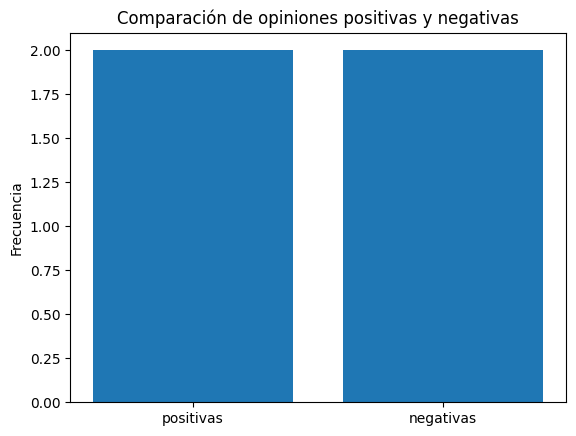

In [15]:
# Conteo de opiniones positivas vs negativas
conteos = {
    "positivas": df_texto["comentario"].str.contains("excelente", case=False).sum() +
                 df_texto["comentario"].str.contains("encantó", case=False).sum(),
    "negativas": df_texto["comentario"].str.contains("lento", case=False).sum() +
                 df_texto["comentario"].str.contains("negativa", case=False).sum()
}

plt.bar(conteos.keys(), conteos.values())
plt.title("Comparación de opiniones positivas y negativas")
plt.ylabel("Frecuencia")
plt.show()


### Análisis del dataset no estructurado  
- Los datos provienen de **texto libre**, sin formato tabular inicial.  
- Para analizarlos es necesario **transformar el texto en información cuantificable** (por ejemplo, conteos o sentimientos).  
- El procesamiento de texto requiere técnicas adicionales como limpieza, tokenización o análisis de sentimientos.  
- A diferencia del CSV, este tipo de datos **no se puede resumir directamente** con estadísticas simples.


## Conclusión general
| Característica | Estructurado (CSV) | No estructurado (JSON / texto) |
|-----------------|--------------------|--------------------------------|
| Formato | Tablas con filas y columnas | Texto libre o jerárquico |
| Lectura con Pandas | Directa con `read_csv()` | Requiere `json` o procesamiento previo |
| Análisis estadístico | Fácil, rápido | Requiere limpieza y preprocesamiento |
| Visualización | Inmediata | Necesita métricas derivadas |
| Ejemplo | Iris Dataset | Opiniones de usuarios |

**Conclusión:** Los datos estructurados son más simples de analizar y visualizar directamente, mientras que los no estructurados ofrecen información más rica pero requieren un proceso adicional de interpretación y transformación.


### Reflexión personal  
Este ejercicio permitió comprender las diferencias entre el tratamiento de datos estructurados y no estructurados.  
Reconocí la importancia de adaptar las herramientas de análisis al tipo de datos disponible y la relevancia del preprocesamiento cuando se trabaja con texto libre.  
El uso de Python y Pandas facilitó la comprensión práctica de ambos enfoques.
